In [1]:
#Importaion des package
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as py 
import pandas as pd 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
#Chargement de la base de données
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
#Ajout d'une colonne classe names 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
#Convertir on données catégoriales
y_cat_train = to_categorical(y_train,10)

In [5]:
y_cat_test = to_categorical(y_test,10)

In [6]:
#Exploration des données
X_train.shape
len(y_train) #pour voir la taille des labels


50000

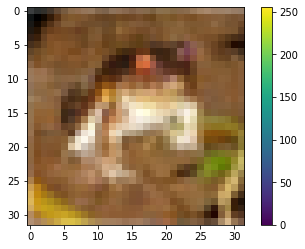

In [7]:
#Pré_traitement des données 
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [8]:
# Normalisation des données (Mettre les valeurs à l'échalle de 0 à 1)
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
#Vérification du format des images 
#Affichage des 20 premières images de l' ensemble d'entraînement et affichons le nom de la classe sous chaque image.

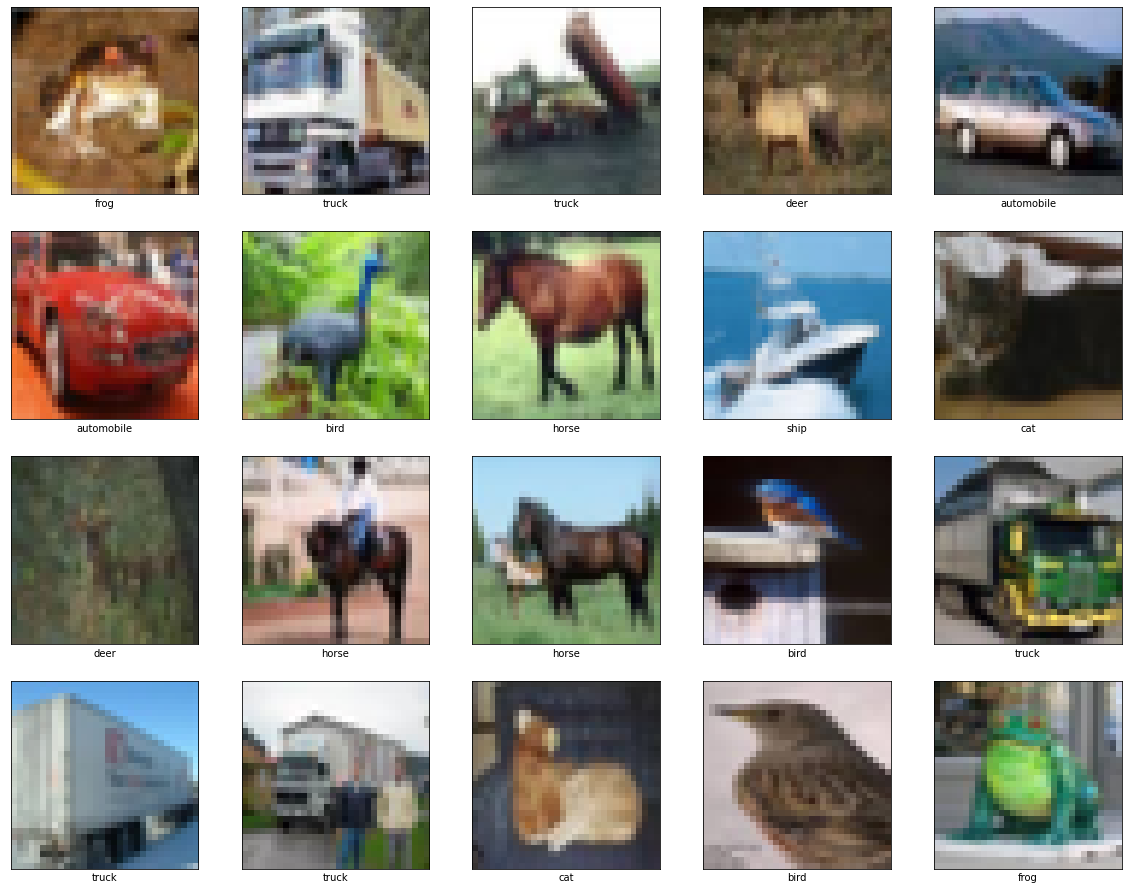

In [10]:
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.grid()
plt.show()

In [11]:
#Création du model 


In [12]:
#Partie Feature_learning
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3))) 
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
#model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.50))
model.add(Dense(10))
model.add(Activation('sigmoid'))

In [13]:
#Synthèse du réseau 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         7

Epoch 1/80
49/49 [==============================] - 3s 65ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3025 - val_accuracy: 0.0981
Epoch 2/80
49/49 [==============================] - 2s 51ms/step - loss: 2.3024 - accuracy: 0.1063 - val_loss: 2.3023 - val_accuracy: 0.1221
Epoch 3/80
49/49 [==============================] - 2s 49ms/step - loss: 2.3023 - accuracy: 0.1157 - val_loss: 2.3022 - val_accuracy: 0.1533
Epoch 4/80
49/49 [==============================] - 2s 51ms/step - loss: 2.3022 - accuracy: 0.1272 - val_loss: 2.3020 - val_accuracy: 0.1666
Epoch 5/80
49/49 [==============================] - 2s 50ms/step - loss: 2.3020 - accuracy: 0.1318 - val_loss: 2.3018 - val_accuracy: 0.2014
Epoch 6/80
49/49 [==============================] - 2s 51ms/step - loss: 2.3018 - accuracy: 0.1513 - val_loss: 2.3015 - val_accuracy: 0.2392
Epoch 7/80
49/49 [==============================] - 2s 50ms/step - loss: 2.3015 - accuracy: 0.1599 - val_loss: 2.3011 - val_accuracy: 0.2384
Epoch 8/80
49

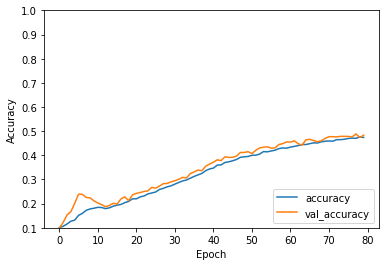

In [14]:
#Le complément connecté (Fully connected)

model.compile(tf.keras.optimizers.SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


for epochs in [80] :
    history = model.fit(X_train, y_train, epochs=epochs,batch_size=1024,verbose=1, validation_data=(X_test, y_test))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.1, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

    print(test_loss)
    print(test_acc)

    #clear_session()

Epoch 1/80
49/49 [==============================] - 3s 58ms/step - loss: 1.9277 - accuracy: 0.4013 - val_loss: 1.8657 - val_accuracy: 0.4719
Epoch 2/80
49/49 [==============================] - 3s 52ms/step - loss: 1.8600 - accuracy: 0.4668 - val_loss: 1.8616 - val_accuracy: 0.4824
Epoch 3/80
49/49 [==============================] - 3s 52ms/step - loss: 1.8482 - accuracy: 0.4784 - val_loss: 1.8539 - val_accuracy: 0.4846
Epoch 4/80
49/49 [==============================] - 3s 53ms/step - loss: 1.8425 - accuracy: 0.4861 - val_loss: 1.8437 - val_accuracy: 0.4927
Epoch 5/80
49/49 [==============================] - 3s 53ms/step - loss: 1.8293 - accuracy: 0.5014 - val_loss: 1.8353 - val_accuracy: 0.5057
Epoch 6/80
49/49 [==============================] - 3s 54ms/step - loss: 1.8236 - accuracy: 0.5072 - val_loss: 1.8310 - val_accuracy: 0.5076
Epoch 7/80
49/49 [==============================] - 3s 53ms/step - loss: 1.8088 - accuracy: 0.5214 - val_loss: 1.8359 - val_accuracy: 0.5104
Epoch 8/80
49

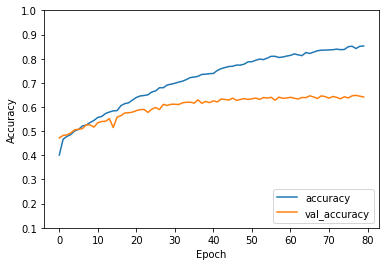

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


for epochs in [80] :
    history = model.fit(X_train, y_train, epochs=epochs,batch_size=1024,verbose=1, validation_data=(X_test, y_test))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.1, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

    print(test_loss)
    print(test_acc)